# Etapa 1: Instalar e importar bibliotecas

In [1]:
''' Instalação e importação de bibliotecas '''

! pip install kagglehub==0.3.12 pysubgroup==0.8.0 numpy==2.0.2 pandas==2.2.2 seaborn==0.13.2 matplotlib==3.10.0



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
''' Importando bibliotecas '''

import kagglehub # Lib for loading data directly from Kaggle
from kagglehub import KaggleDatasetAdapter # Load dataset as a 🐼 dataframe

import numpy as np # math processing
import pandas as pd # dataframe handling
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # Yet Another Data Visualization lib
import pysubgroup as ps # Finding relevant subgroups
import math # Ceil Function


/home/larissa/.pyenv/versions/3.11.9/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/larissa/.pyenv/versions/3.11.9/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  F

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/larissa/.pyenv/versions/3.11.9/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/larissa/.pyenv/versions/3.11.9/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/larissa/.pyenv/versions/3.11.9/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
  

AttributeError: _ARRAY_API not found

# Etapa 2: Carregamento dos dados

In [3]:
''' FUNC: load_dataframe
  - dataset_url = 'https://www.kaggle.com/datasets/arjunbhasin2013/ccdata'
'''

def load_dataframe():
  ''' Getting dataset directly from Kaggle using KaggleHub

  '''
  file_path = 'CC GENERAL.csv'
  data = 'arjunbhasin2013/ccdata'

  df_loaded = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, data, file_path)
  return df_loaded


In [4]:
''' RUN: Getting Dataframe '''

df_loaded = load_dataframe()

/tmp/ipykernel_91968/2824989722.py:12: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_loaded = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, data, file_path)


## Etapa 2.1: Descrevendo os dados

| Data Type | Column                           | Description                                             | Range            |                Range Explanation |
| :-------- | -------------------------------- | ------------------------------------------------------- | ---------------- | -------------------------------: |
| `float64` | BALANCE                          | Balance amount left in their account to make purchases  | [0, 19043.14]    |                                  |
| `float64` | BALANCE_FREQUENCY                | How frequently the Balance is updated                   | [0, 1.00]        |   Frequently updated? (1=Y, 0=N) |
| `float64` | CASH_ADVANCE                     | Cash in advance given by the user                       | [0, 47137.21]    |                                  |
| `float64` | CASH_ADVANCE_FREQUENCY           | How frequently the cash in advance being paid           | [0, 1.50]        |                                  |
| `float64` | CREDIT_LIMIT                     | Limit of Credit Card for user                           | [0, 30000.00]    |                                  |
| `float64` | INSTALLMENTS_PURCHASES           | Amount of purchase done in installment                  | [0, 22500.00]    |                                  |
| `float64` | MINIMUM_PAYMENTS                 | Minimum amount of payments made by user                 | [0, 76406.21]    |                                  |
| `float64` | ONEOFF_PURCHASES                 | Maximum purchase amount done in one-go                  | [0, 40761.25]    |                                  |
| `float64` | ONEOFF_PURCHASES_FREQUENCY       | How frequently Purchases are happening in one-go        | [0, 1.00]        | Frequently Purchased? (1=Y, 0=N) |
| `float64` | PAYMENTS                         | Amount of Payment done by user                          | [0, 50721.48]    |                                  |
| `float64` | PRC_FULL_PAYMENT                 | Percent of full payment paid by user                    | [0, 1.00]        |                                  |
| `float64` | PURCHASES                        | Amount of purchases made from account                   | [0, 49039.57]    |                                  |
| `float64` | PURCHASES_FREQUENCY              | How frequently the Purchases are being made             | [0, 1.00]        | Frequently Purchased? (1=Y, 0=N) |
| `float64` | PURCHASES_INSTALLMENTS_FREQUENCY | How frequently purchases in installments are being done | [0, 1.00]        |      Frequently Done? (1=Y, 0=N) |
| `int64`   | CASH_ADVANCE_TRX                 | Number of Transactions made with "Cash in Advanced"     | [0, 123]         |                                  |
| `int64`   | PURCHASES_TRX                    | Numbe of purchase transactions made                     | [0, 358]         |                                  |
| `int64`   | TENURE                           | Tenure of credit card service for user                  | [6, 12]          |                                  |
| `string`  | CUST_ID                          | Identification of Credit Card holder                    | [C10001, C19190] |                      Categorical |




In [5]:
''' RUN: DF Shape '''

print(f'Dataframe shape is: {df_loaded.shape}')

Dataframe shape is: (8950, 18)


In [6]:
''' RUN: DF Head '''

df_loaded.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
''' RUN: Describing dataframe '''

df_loaded.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
''' RUN: DF Info '''

df_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
''' FUNC: debug_print_null_values '''

def debug_print_null_values(df):
  ''' Printing how many NAN and No-NAN values there are '''
  sum_null = df.isnull().sum()
  no_nan_cols = []
  nan_cols = []
  print('# Showing DF NAN value count')
  zero_msg = ''
  for key, value in sum_null.items():
    if value == 0:
      no_nan_cols.append(key)
    if value > 0:
      nan_cols.append((key, value))

  if nan_cols:
    print(f'\tNAN\t({len(nan_cols)}):\t', end='')
    nan_cols_msg = ''
    for (key, value) in nan_cols:
      nan_cols_msg += f'{key}: {value};\t'
    print(nan_cols_msg[:-2])

    # for (key, value) in nan_cols:
    #   print(value, '\t', key)

  if no_nan_cols:
    print(f'\tNo-NAN\t({len(no_nan_cols)}):\t', ', '.join(no_nan_cols), '\n')


In [10]:
''' RUN: Showing NAN/Null data '''

debug_print_null_values(df_loaded)

# Showing DF NAN value count
	NAN	(2):	CREDIT_LIMIT: 1;	MINIMUM_PAYMENTS: 313
	No-NAN	(16):	 CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, PAYMENTS, PRC_FULL_PAYMENT, TENURE 



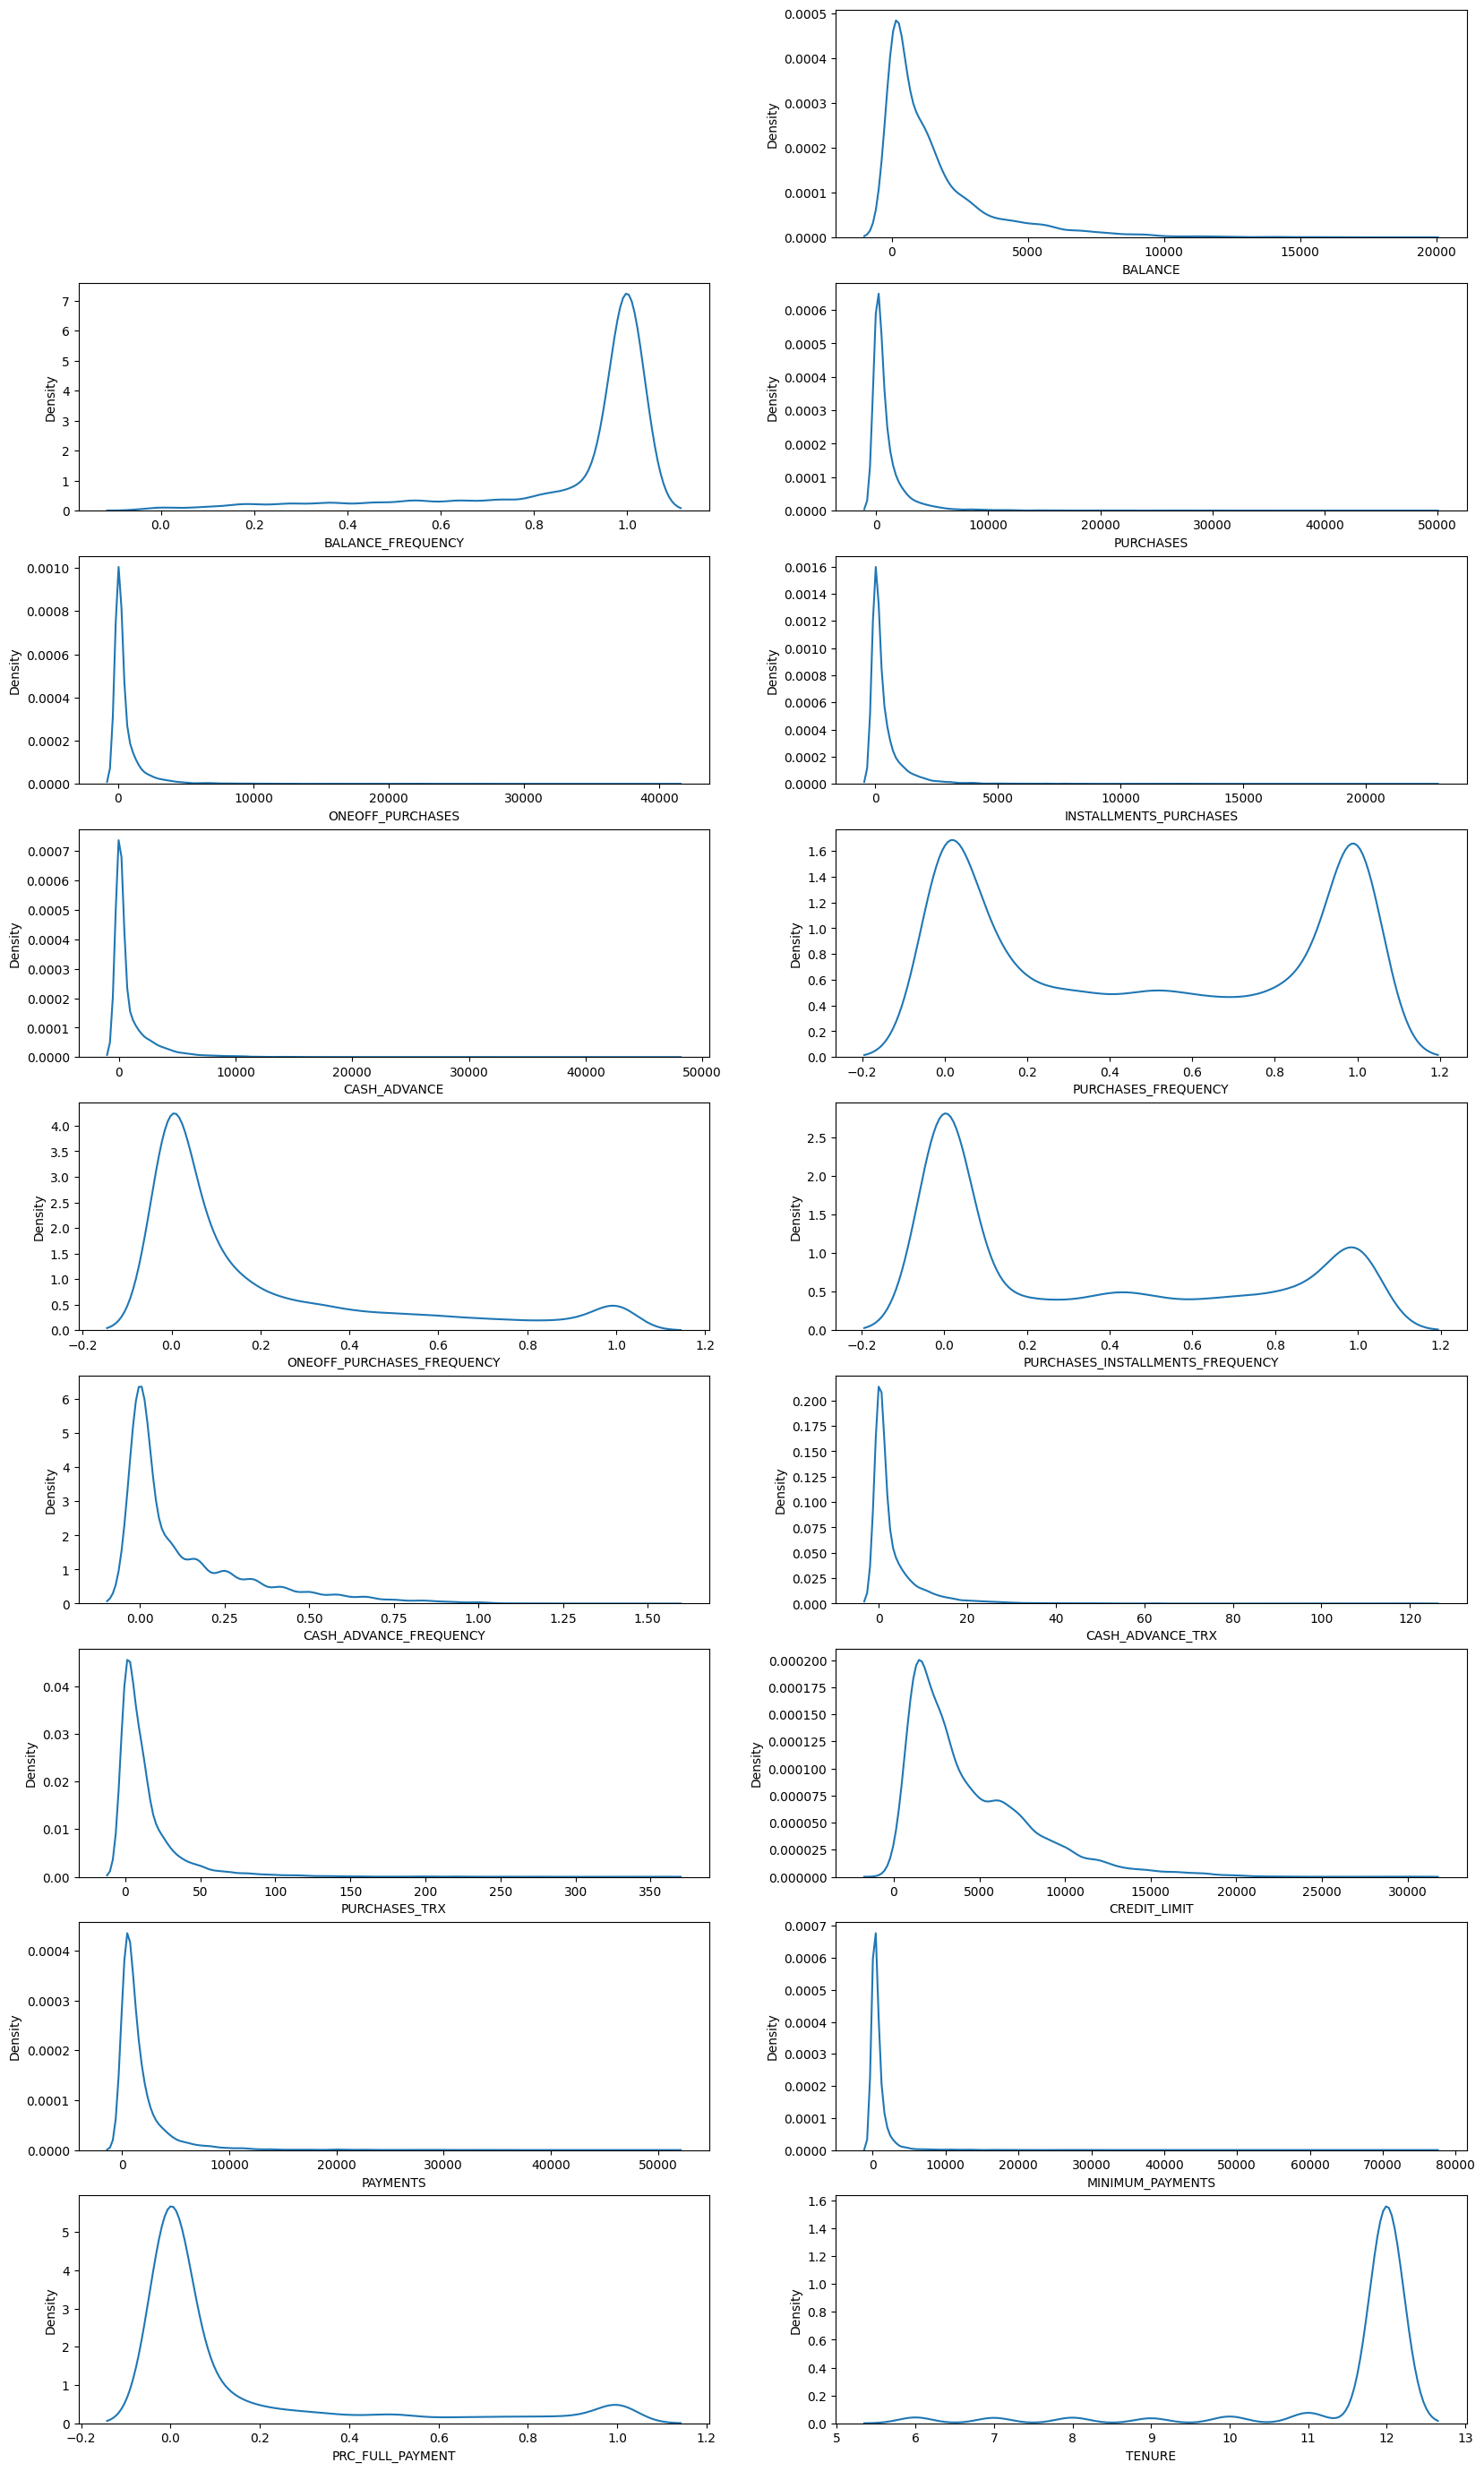

In [11]:
''' Values density distribution in the df '''

def plot_df_density_distribution(df):
  ''' Plots the density distribution of each column in the dataframe '''
  plt.figure(figsize=(20,35))
  for i, col in enumerate(df.columns):
      if df[col].dtype != 'object':
          ax = plt.subplot(9, 2, i+1)
          sns.kdeplot(df[col], ax=ax)
          plt.xlabel(col)

  plt.show()

plot_df_density_distribution(df_loaded)

## Etapa 2.1: pre-processamento

- Métodos de pré-processamento:
  - Tratar valores ausentes
    - Remoção
    - Média
    - Mediana
  - Arredondar valores para duas casas decimais
  - Remoção de colunas não necessárias

In [12]:
''' RUN: copying data '''

# Copy loaded df to df variable

# df = df_loaded.copy()
df_joao = df_loaded.copy()
df_lari = df_loaded.copy()
df_samu = df_loaded.copy()
df_aman = df_loaded.copy()
df_gabr = df_loaded.copy()

df_gen = df_loaded.copy()


### Etapa 2.1.1: Tratar valores ausentes

In [13]:
''' VAR: Removendo ou preenchendo os valores ausentes '''

def treat_missing_values(df, method='drop'):
  ''' Treats missing value: drop, mean, median '''
  if method == 'drop':
    return df.dropna()
  if method == 'mean':
    return df.fillna(df.mean(numeric_only=True), inplace=True)
  if method == 'median':
    return df.fillna(df.median(numeric_only=True))
  return df

df_joao = treat_missing_values(df_joao, 'drop') # Como são poucos os valores vazios, podemos remover os valores ausentes
df_lari = treat_missing_values(df_lari, 'mean') # Preenchendo vazios por suas médias
df_samu = treat_missing_values(df_samu, 'median') # Como tempos poucos dados, em vez de excluir os valores nulos, vamos substituí-los pela mediana da coluna
df_aman = treat_missing_values(df_aman, 'median')
df_gabr = treat_missing_values(df_gabr, 'drop') # Removendo valores ausentes

df_gen = treat_missing_values(df_gen)


### Etapa 2.1.2: Remover colunas que não serão usadas diretamente

In [14]:
''' Removendo colunas não utilizadas '''

# df_lari = df.drop(columns=['CUST_ID']) # Não precisamos remover aqui. podemos ignorar durante o BS

' Removendo colunas não utilizadas '

### Etapa 2.1.3: Codificar variáveis categóricas

- Uma das formas de se gerar subgrupos é previamente convertendo variáveis contínuas em variáveis categóricas

# Etapa 3: Executando algoritmo de busca de subgrupos


### Etapa 3.1: Definindo os alvos

In [15]:
''' VAR: Defining target columns '''

target_col = {
    'aman': 'PURCHASES_FREQUENCY',
    'gabr': 'PURCHASES_TRX',
    'lari': 'ONEOFF_PURCHASES',
    'samu': 'BALANCE',
}

targets = {
    'aman': ps.NumericTarget(target_col['aman']),
    'gabrAll': ps.NumericTarget(target_col['gabr']),
    'gabrPurchases': ps.NumericTarget(target_col['gabr']),
    'gabrFinancial': ps.NumericTarget(target_col['gabr']),
    'lari': ps.BinaryTarget(target_col['lari'], 'médio'),
    'samu': ps.NumericTarget(target_col['samu']),
}


### Etapa 3.2: Definindo espaço de busca

A exclusão do alvo é para evitar padrões com ele mesmo.
O ID é excluído porque é único para cada cliente.

In [16]:
''' VAR: Setting Search Spaces

- ps.create_selectors(data, nbins=5, intervals_only=True, ignore=None)
'''

ignores = {
    'aman': ['CUST_ID', target_col['aman']],
    'gabrAll': ['CUST_ID', target_col['gabr']],
    'gabrPurchases': ['CUST_ID', target_col['gabr'],
                      "BALANCE",
                      "BALANCE_FREQUENCY",
                      "CASH_ADVANCE",
                      "CASH_ADVANCE_FREQUENCY",
                      "CASH_ADVANCE_TRX",
                      "CREDIT_LIMIT",
                      "PAYMENTS",
                      "MINIMUM_PAYMENTS",
                      "PRC_FULL_PAYMENT",
                      "TENURE",
                      ],
    'gabrFinancial': ['CUST_ID', target_col['gabr'],
                      "BALANCE_FREQUENCY",
                      "PURCHASES",
                      "ONEOFF_PURCHASES",
                      "INSTALLMENTS_PURCHASES",
                      "PURCHASES_FREQUENCY",
                      "ONEOFF_PURCHASES_FREQUENCY",
                      "PURCHASES_INSTALLMENTS_FREQUENCY",
                      "CREDIT_LIMIT",
                      "TENURE",
                      ],
    # 'lari': ['CUST_ID', target_col['lari']],
    'samu': ['CUST_ID', target_col['samu']],
}

selects = {
    'lari': ['BALANCE', 'CREDIT_LIMIT', 'PURCHASES', 'PURCHASES_FREQUENCY', 'PURCHASES_TRX', 'ONEOFF_PURCHASES_FREQUENCY'],
}

search_spaces = {
    'aman': ps.create_selectors(df_aman, ignore=ignores['aman']),
    'gabrAll': ps.create_selectors(df_gabr, ignore=ignores['gabrAll']),
    'gabrPurchases': ps.create_selectors(df_gabr, ignore=ignores['gabrPurchases']),
    'gabrFinancial': ps.create_selectors(df_gabr, ignore=ignores['gabrFinancial']),
    # 'lari': ps.create_selectors(df_lari[selects]),
    'samu': ps.create_selectors(df_samu, ignore=ignores['samu']),
}

### Etapa 3.3: Definindo Funções de qualidade

- Amanda: Avaliando a diferença da média em desvios padrão

In [17]:
''' FUNC: Setting Quality Functions
- SAMU:
  - Usaremos a StandardQF, que mede a diferença da média do subgrupo em desvios padrão
  - O parâmetro 'a' ajuda a ponderar o tamanho do subgrupo.
  ---
- GABR:
  - ps.StandardQFNumeric(a, invert=False, estimator='default', centroid='mean')
      # This quality function computes interestingness of subgroups based on the difference between subgroup mean (or median) and dataset mean (or median),
      # weighted by the size of the subgroup raised to the power of 'a'.
    - a (float): Exponent to trade off between subgroup size and difference in means.
      # Ao caminhar pelos valores de a na direção de 1.0 -> 0.0, subgrupos de tamanho menor e com diferenças mais extremas na média em relação à população
      # (para compensar a menor recompensação pelo seu pequeno tamanho) são retornados.
      # Subgrupos menores são descritos por um número maior de variáveis, o que dificulta a interpretação.
      #
      # groupSizeReward
    - invert (bool): Whether to invert the quality function (not used currently).
    - estimator (str): Strategy for optimistic estimation ('sum', 'max', 'order').
    - centroid (str): Central tendency measure ('mean', 'median', 'sorted_median').

'''

def get_quality_func(name='stfQF', a=0.5, centroid='mean'):
  ''' Returns a quality metric function '''
  gen_quality_func = {
      'stdQF': ps.StandardQFNumeric(a, centroid=centroid),
      'stdQFTscore': ps.StandardQFNumericTscore(),
      'WRAcc': ps.WRAccQF(),
  }
  return gen_quality_func[name] if name in gen_quality_func else gen_quality_func['stdQF']


### Etapa 3.4: Definindo tasks do Beam-Search

In [18]:
''' VAR: Setting Tasks

Parâmetros: ps.SubgroupDiscoveryTask(data, target, search_space, qf, result_set_size=10, depth=3, min_quality=float('-inf'), constraints=None)
  - result_set_size = 10: Quantidade de subgrupos que queremos que sejam retornados
  - depth = 3: Profundidade máxima da descrição//Quantidade máxima de descritores
'''

def get_task(df, target, qf='stdQF', a=0.5, subgroup_size=10, desc_size=3):
  ''' Returns the search task '''
  task = ps.SubgroupDiscoveryTask(df, targets[target], search_spaces[target], get_quality_func(qf, a), result_set_size=subgroup_size, depth=desc_size)
  return task

tasks = {
    'aman': get_task(df_aman, 'aman'),
    # 'lari': get_task(df_lari, 'lari'),
    'samu': get_task(df_samu, 'samu'),
}

### Etapa 3.5: Executando Beam-Search

In [19]:
''' Executando o beam search do PySubgroups para encontrar os subgrupos relevantes '''

results = {
    'aman': ps.BeamSearch().execute(tasks['aman']),
    # 'gabr': ps.BeamSearch().execute(tasks['gabr']),
    # 'lari': ps.BeamSearch().execute(tasks['lari']),
    'samu': ps.BeamSearch().execute(tasks['samu']),
}

results_df = {
    'aman': results['aman'].to_dataframe(),
    # 'gabr': results['gabr'].to_dataframe(),
    # 'lari': results['lari'].to_dataframe(),
    'samu': results['samu'].to_dataframe(),
}


In [20]:
''' Testes Gabriel '''


tests = {
    # == Descrições com Todas as Variáveis ==
    ## === Standard Quality Function for numeric targets. ===
    'SD1': get_task(df=df_gabr, target='gabrAll', qf='stdQF', a=0.5, desc_size=8), # SD 1: alvo numérico - todos os seletores - regras grandes  (8) + punição 0.5 - média
    'SD2': get_task(df=df_gabr, target='gabrAll', qf='stdQF', a=0.3, desc_size=8), # SD 2: alvo numérico - todos os seletores - regras grandes  (8) + punição 0.3 - média
    # == Descrições com as Variáveis de Comportamento de Compra ==
    ## === Standard Quality Function for numeric targets. ===
    'SD3': get_task(df=df_gabr, target='gabrPurchases', qf='stdQF', a=0.5, desc_size=8), # SD 3: alvo numérico - seletores de compra - regras grandes  (8) + punição 0.5 - média
    'SD4': get_task(df=df_gabr, target='gabrPurchases', qf='stdQF', a=0.3, desc_size=8), # SD 4: alvo numérico - seletores de compra - regras grandes  (8) + punição 0.3 - média
    # == Descrições com as Variáveis de Comportamento Financeiro ==
    ## === Standard Quality Function for numeric targets. ===
    'SD5': get_task(df=df_gabr, target='gabrFinancial', qf='stdQF', a=0.5, desc_size=8), # SD 3: alvo numérico - seletores financeiros - regras grandes  (8) + punição 0.5 - média
    'SD6': get_task(df=df_gabr, target='gabrFinancial', qf='stdQF', a=0.3, desc_size=8), # SD 4: alvo numérico - seletores financeiros - regras grandes  (8) + punição 0.3 - média
}


In [21]:
allObvious = ps.BeamSearch().execute(tests['SD1'])
allLessObvious = ps.BeamSearch().execute(tests['SD2'])

purchaseObivous = ps.BeamSearch().execute(tests['SD3'])
purchaseLessObvious = ps.BeamSearch().execute(tests['SD4'])

financeObvious = ps.BeamSearch().execute(tests['SD5'])
financeLessObvious = ps.BeamSearch().execute(tests['SD6'])

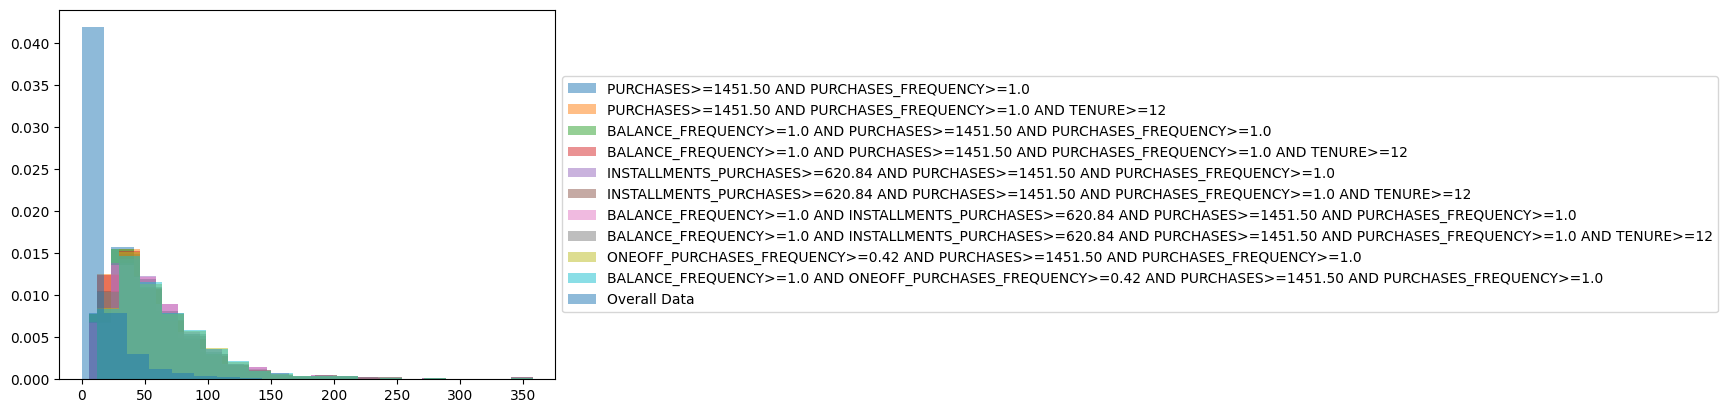

In [22]:
ps.plot_distribution_numeric(allObvious.to_descriptions(), targets['gabrAll'], df_gabr, 20)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

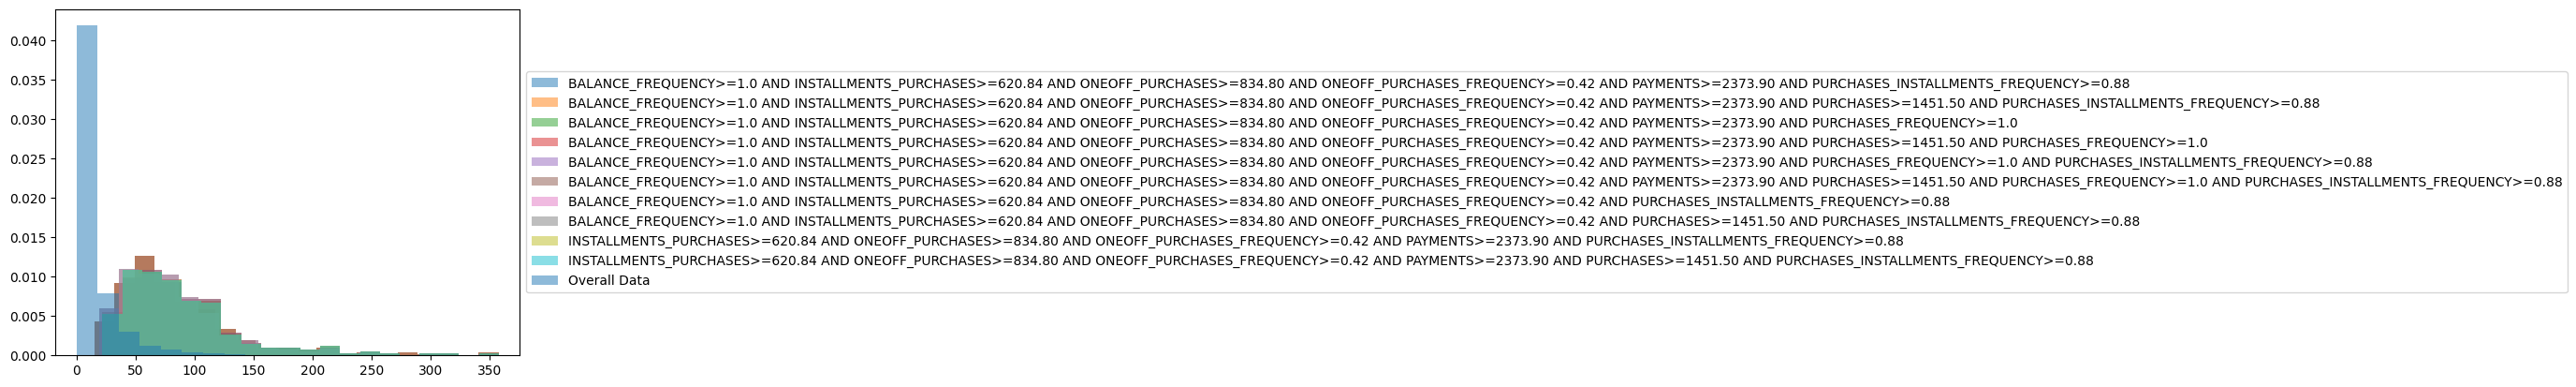

In [23]:
ps.plot_distribution_numeric(allLessObvious.to_descriptions(), targets['gabrAll'], df_gabr, 20)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

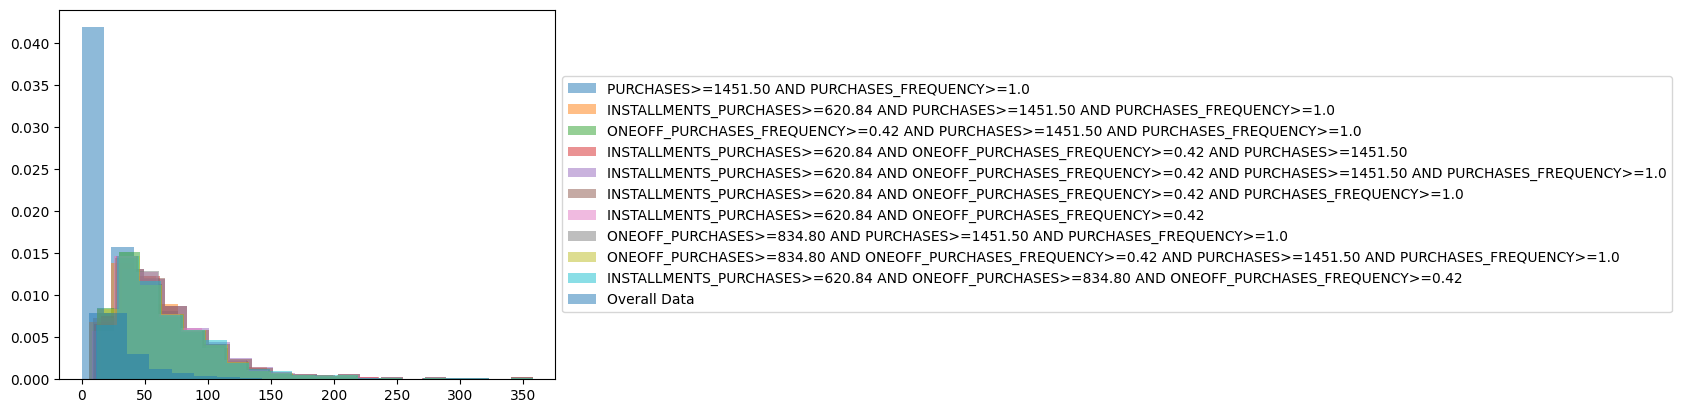

In [24]:
ps.plot_distribution_numeric(purchaseObivous.to_descriptions(), targets['gabrPurchases'], df_gabr, 20)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

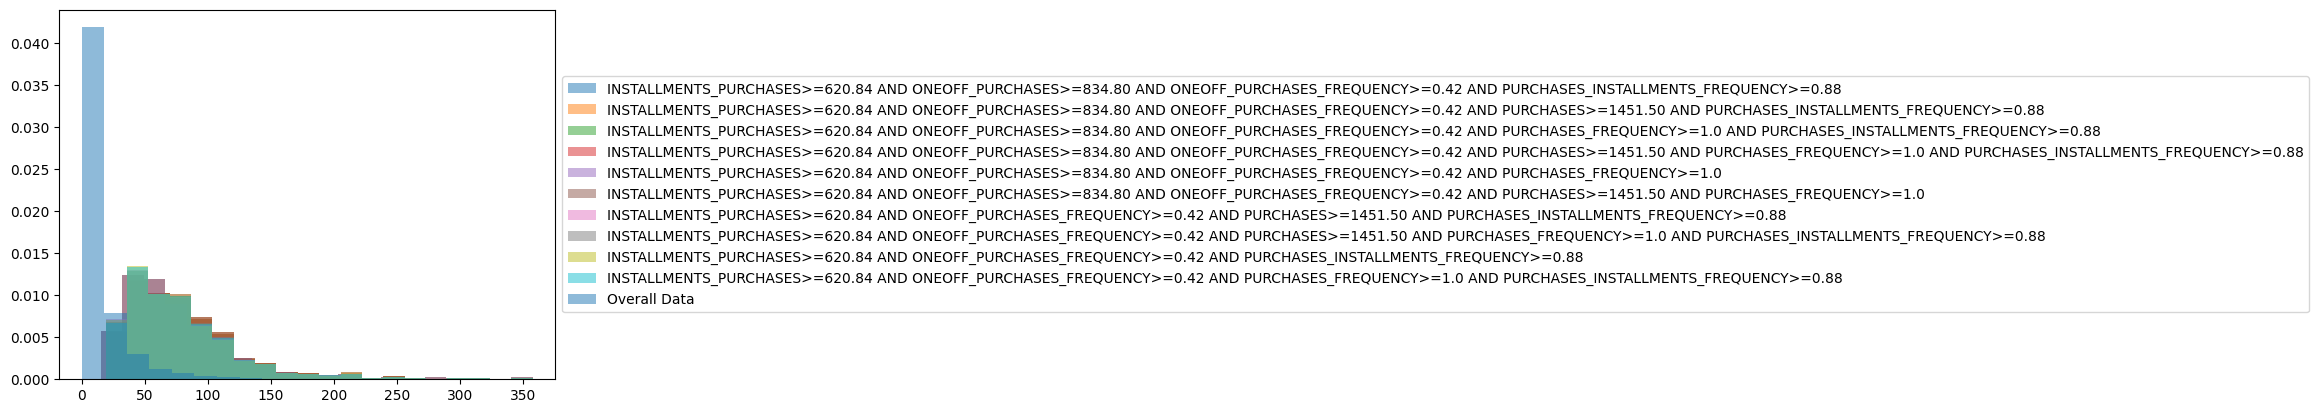

In [25]:
ps.plot_distribution_numeric(purchaseLessObvious.to_descriptions(), targets['gabrPurchases'], df_gabr, 20)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

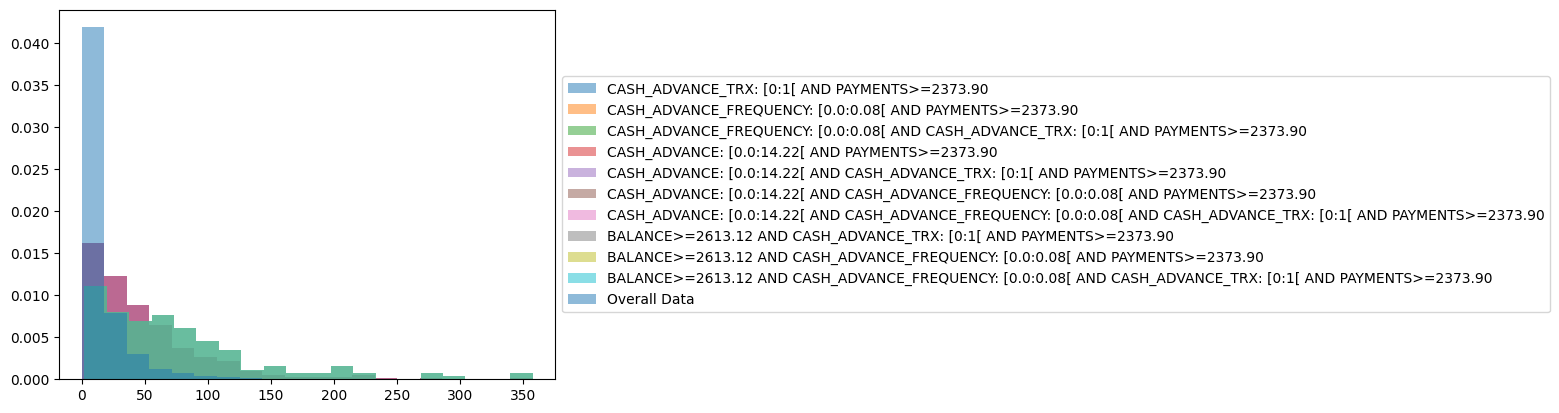

In [26]:
ps.plot_distribution_numeric(financeObvious.to_descriptions(), targets['gabrFinancial'], df_gabr, 20)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

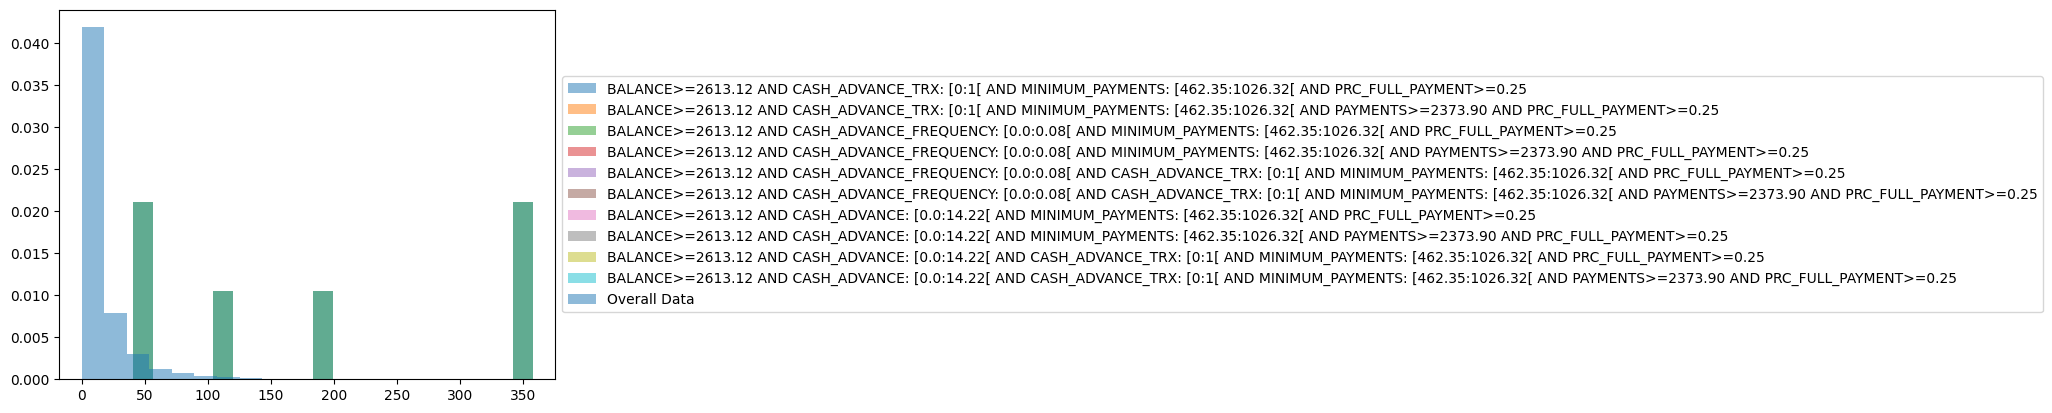

In [27]:
ps.plot_distribution_numeric(financeLessObvious.to_descriptions(), targets['gabrFinancial'], df_gabr, 20)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

Text(0.5, 1.0, 'Distribuição do Valor Total Gasto em Compras (log)')

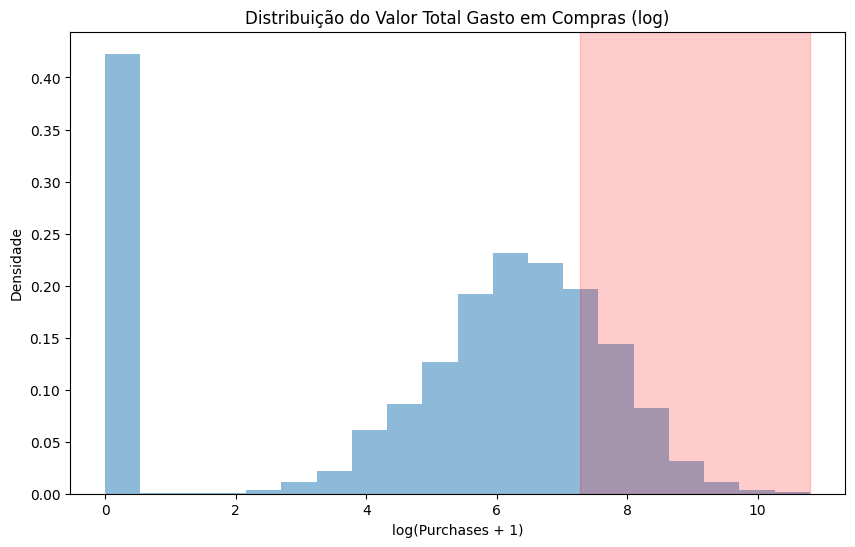

In [28]:
# Visualizando o seletor de compras PURCHASES >= 1451.50

targetValuesData = np.log1p(df_gabr[ps.NumericTarget('PURCHASES').get_attributes()].values)
treshhold = np.log1p(1451.50)

thresholdOriginal = 1451.50
transformedThreshold = np.log1p(thresholdOriginal)

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(targetValuesData, 20, alpha=0.5, label="Overall Data", density=True)
ax.axvspan(transformedThreshold, targetValuesData.max(), color='red', alpha=0.2, label=f'Purchases > {thresholdOriginal:.2f}')
ax.set_xlabel('log(Purchases + 1)')
ax.set_ylabel('Densidade')
ax.set_title('Distribuição do Valor Total Gasto em Compras (log)')

In [29]:
# Estatísticas dos subgrupos

allObvious.to_dataframe()

,quality,subgroup,size_sg,size_dataset,mean_sg,mean_dataset,std_sg,std_dataset,median_sg,median_dataset,max_sg,max_dataset,min_sg,min_dataset,mean_lift,median_lift
0,1376.919934,PURCHASES>=1451.50 AND PURCHASES_FREQUENCY>=1.0,981,8636,58.994903,15.033233,44.375460,25.17901,48.0,7.0,358,358,6,0,3.924299,6.857143
1,1374.712320,PURCHASES>=1451.50 AND PURCHASES_FREQUENCY>=1....,953,8636,59.564533,15.033233,44.559359,25.17901,48.0,7.0,358,358,12,0,3.962191,6.857143
2,1372.529295,BALANCE_FREQUENCY>=1.0 AND PURCHASES>=1451.50 ...,942,8636,59.752654,15.033233,44.916074,25.17901,49.0,7.0,358,358,6,0,3.974704,7.000000
3,1370.005766,BALANCE_FREQUENCY>=1.0 AND PURCHASES>=1451.50 ...,917,8636,60.274809,15.033233,45.070849,25.17901,49.0,7.0,358,358,12,0,4.009438,7.000000
4,1339.369029,INSTALLMENTS_PURCHASES>=620.84 AND PURCHASES>=...,767,8636,63.395046,15.033233,47.380500,25.17901,51.0,7.0,358,358,6,0,4.216993,7.285714
5,1336.844301,INSTALLMENTS_PURCHASES>=620.84 AND PURCHASES>=...,748,8636,63.913102,15.033233,47.517874,25.17901,51.0,7.0,358,358,12,0,4.251454,7.285714
6,1334.651225,BALANCE_FREQUENCY>=1.0 AND INSTALLMENTS_PURCHA...,735,8636,64.262585,15.033233,47.992946,25.17901,52.0,7.0,358,358,6,0,4.274702,7.428571
7,1331.641489,BALANCE_FREQUENCY>=1.0 AND INSTALLMENTS_PURCHA...,717,8636,64.764296,15.033233,48.135866,25.17901,52.0,7.0,358,358,12,0,4.308075,7.428571
8,1329.600072,ONEOFF_PURCHASES_FREQUENCY>=0.42 AND PURCHASES...,691,8636,65.613603,15.033233,44.704883,25.17901,53.0,7.0,358,358,12,0,4.364570,7.571429
9,1324.520460,BALANCE_FREQUENCY>=1.0 AND ONEOFF_PURCHASES_FR...,669,8636,66.242152,15.033233,45.121043,25.17901,54.0,7.0,358,358,12,0,4.406381,7.714286


In [30]:
allLessObvious.to_dataframe()

,quality,subgroup,size_sg,size_dataset,mean_sg,mean_dataset,std_sg,std_dataset,median_sg,median_dataset,max_sg,max_dataset,min_sg,min_dataset,mean_lift,median_lift
0,389.750632,BALANCE_FREQUENCY>=1.0 AND INSTALLMENTS_PURCHA...,240,8636,90.320833,15.033233,53.076450,25.17901,79.5,7.0,358,358,22,0,6.008078,11.357143
1,389.750632,BALANCE_FREQUENCY>=1.0 AND INSTALLMENTS_PURCHA...,240,8636,90.320833,15.033233,53.076450,25.17901,79.5,7.0,358,358,22,0,6.008078,11.357143
2,389.132812,BALANCE_FREQUENCY>=1.0 AND INSTALLMENTS_PURCHA...,299,8636,85.404682,15.033233,53.769732,25.17901,71.0,7.0,358,358,15,0,5.681059,10.142857
3,389.132812,BALANCE_FREQUENCY>=1.0 AND INSTALLMENTS_PURCHA...,299,8636,85.404682,15.033233,53.769732,25.17901,71.0,7.0,358,358,15,0,5.681059,10.142857
4,388.384185,BALANCE_FREQUENCY>=1.0 AND INSTALLMENTS_PURCHA...,231,8636,90.922078,15.033233,52.878960,25.17901,80.0,7.0,358,358,22,0,6.048072,11.428571
5,388.384185,BALANCE_FREQUENCY>=1.0 AND INSTALLMENTS_PURCHA...,231,8636,90.922078,15.033233,52.878960,25.17901,80.0,7.0,358,358,22,0,6.048072,11.428571
6,388.346315,BALANCE_FREQUENCY>=1.0 AND INSTALLMENTS_PURCHA...,329,8636,83.276596,15.033233,49.667460,25.17901,73.0,7.0,358,358,19,0,5.539500,10.428571
7,388.346315,BALANCE_FREQUENCY>=1.0 AND INSTALLMENTS_PURCHA...,329,8636,83.276596,15.033233,49.667460,25.17901,73.0,7.0,358,358,19,0,5.539500,10.428571
8,388.237078,INSTALLMENTS_PURCHASES>=620.84 AND ONEOFF_PURC...,248,8636,89.294355,15.033233,52.647853,25.17901,78.5,7.0,358,358,22,0,5.939797,11.214286
9,388.237078,INSTALLMENTS_PURCHASES>=620.84 AND ONEOFF_PURC...,248,8636,89.294355,15.033233,52.647853,25.17901,78.5,7.0,358,358,22,0,5.939797,11.214286


**Conclusões Alcançadas a Partir dos Testes com os Parâmetros**

* Não há diferença entre os subgrupos retornados entre as duas funções de qualidade, uma utilizando a média e a outra utilizando o T-score.

* O parâmetro **a** é um hiperparâmetro de ajuste fino que permite que você controle o "trade-off" entre encontrar subgrupos que são estatisticamente muito distintos (grande diferença) e subgrupos que são representativos e acionáveis (grande tamanho).

* Escolher o valor para o expoente **a** como 0,3 ou algo menor degrada a qualidade dos subgrupos retornados, mas permite explorar relações entre variáveis menos fortemente correlacionadas com a variável alvo. Isso pode ser útil para induzir padrões menos óbvios.

  * O padrão óbvio pode não ser interessante em si, mas os descritores e as estatísticas do subgrupo quantificam a obviedade. Isso pode ter alguma utilidade.

* Regras muito grandes podem ser difíceis de interpretar e podém ser redundantes.

  * Para explorar melhor o espaço de seletores, pode ser interessante separar os seletores em diferentes categorias de análise e executar tarefas de SD separadas.



# Etapa 4: Analisando Resultados

In [31]:
''' FUNC: Descrevendo grupos encontrados '''

def list_subgroups(results):
  ''' Prints Group description, size, positive, target share and quality based on quality function '''
  for i, (quality, description, stats) in enumerate(results.results):
    group_msg = ''
    group_msg += f'\nSubgrupo #{i+1}'
    group_msg += f'\n\t> Descrição: {description}'
    group_msg += f'\n\t> Tamanho do subgrupo: {stats.size_sg}'
    # group_msg += f'\n\t> Positivos: {stats.positives_count}'
    # group_msg += f'\n\t> Target share: {stats.positives_count}/{stats.size_sg}={(stats.positives_count/stats.size_sg):.4f}'
    group_msg += f'\n\t> Qualidade (qualquer métrica usada): {quality:.2f}'
    print(group_msg)

def list_subgroups_from_df(results_df):
  msg = 'Análise Detalhada dos Subgrupos'
  print('='*len(msg))
  print(msg)
  print('='*len(msg))

  for index, row in results_df.iterrows():
      group_msg = ''
      group_msg += f'\nSubgrupo #{index+1}'
      group_msg += f'\n\t> Descrição: {row["subgroup"]}'
      group_msg += f'\n\t> Tamanho do subgrupo: {row["size_sg"]}'
      media_sg = row['mean_sg']
      group_msg += f'\n\t> Média do Subgrupo: {media_sg:.2f}'
      group_msg += f'\n\t> Qualidade: {row["quality"]:.2f}'
      print(group_msg)
      print('-'*40)



### Etapa 4.1: Mostrando os grupos encontrados

In [32]:
''' RUN: Listando os subgrupos encontrados '''

list_subgroups(results['samu'])
list_subgroups_from_df(results_df['samu'])


Subgrupo #1
	> Descrição: CREDIT_LIMIT>=7000.0 AND MINIMUM_PAYMENTS>=994.39
	> Tamanho do subgrupo: 803
	> Qualidade (qualquer métrica usada): 139102.67

Subgrupo #2
	> Descrição: BALANCE_FREQUENCY>=1.0 AND CREDIT_LIMIT>=7000.0 AND MINIMUM_PAYMENTS>=994.39
	> Tamanho do subgrupo: 740
	> Qualidade (qualquer métrica usada): 138515.07

Subgrupo #3
	> Descrição: CREDIT_LIMIT>=7000.0 AND MINIMUM_PAYMENTS>=994.39 AND PRC_FULL_PAYMENT: [0.0:0.08[
	> Tamanho do subgrupo: 708
	> Qualidade (qualquer métrica usada): 135067.10

Subgrupo #4
	> Descrição: CREDIT_LIMIT>=7000.0 AND MINIMUM_PAYMENTS>=994.39 AND TENURE>=12
	> Tamanho do subgrupo: 726
	> Qualidade (qualquer métrica usada): 133420.29

Subgrupo #5
	> Descrição: MINIMUM_PAYMENTS>=994.39
	> Tamanho do subgrupo: 1790
	> Qualidade (qualquer métrica usada): 122549.93

Subgrupo #6
	> Descrição: BALANCE_FREQUENCY>=1.0 AND MINIMUM_PAYMENTS>=994.39
	> Tamanho do subgrupo: 1643
	> Qualidade (qualquer métrica usada): 122376.47

Subgrupo #7
	> Descri

## Etapa X-1.1: Geração dos gráficos


In [33]:
''' FUNC: Saving plots to SVG and PNG '''

def save_plot_as_svg_and_png(fig, filename_prefix):
  ''' Saves the given matplotlib figure in both SVG and PNG formats.

  Args:
    fig: The matplotlib figure object to save.
    filename_prefix: The prefix for the output filenames (without extension).
  '''
  fig.savefig(f'{filename_prefix}.svg', format='svg')
  fig.savefig(f'{filename_prefix}.png', format='png')
  print(f"Plot saved as {filename_prefix}.svg and {filename_prefix}.png")

# Example usage (assuming 'fig' is the figure object from the previous plot)
# save_plot_as_svg_and_png(fig, 'credit_limit_comparison')

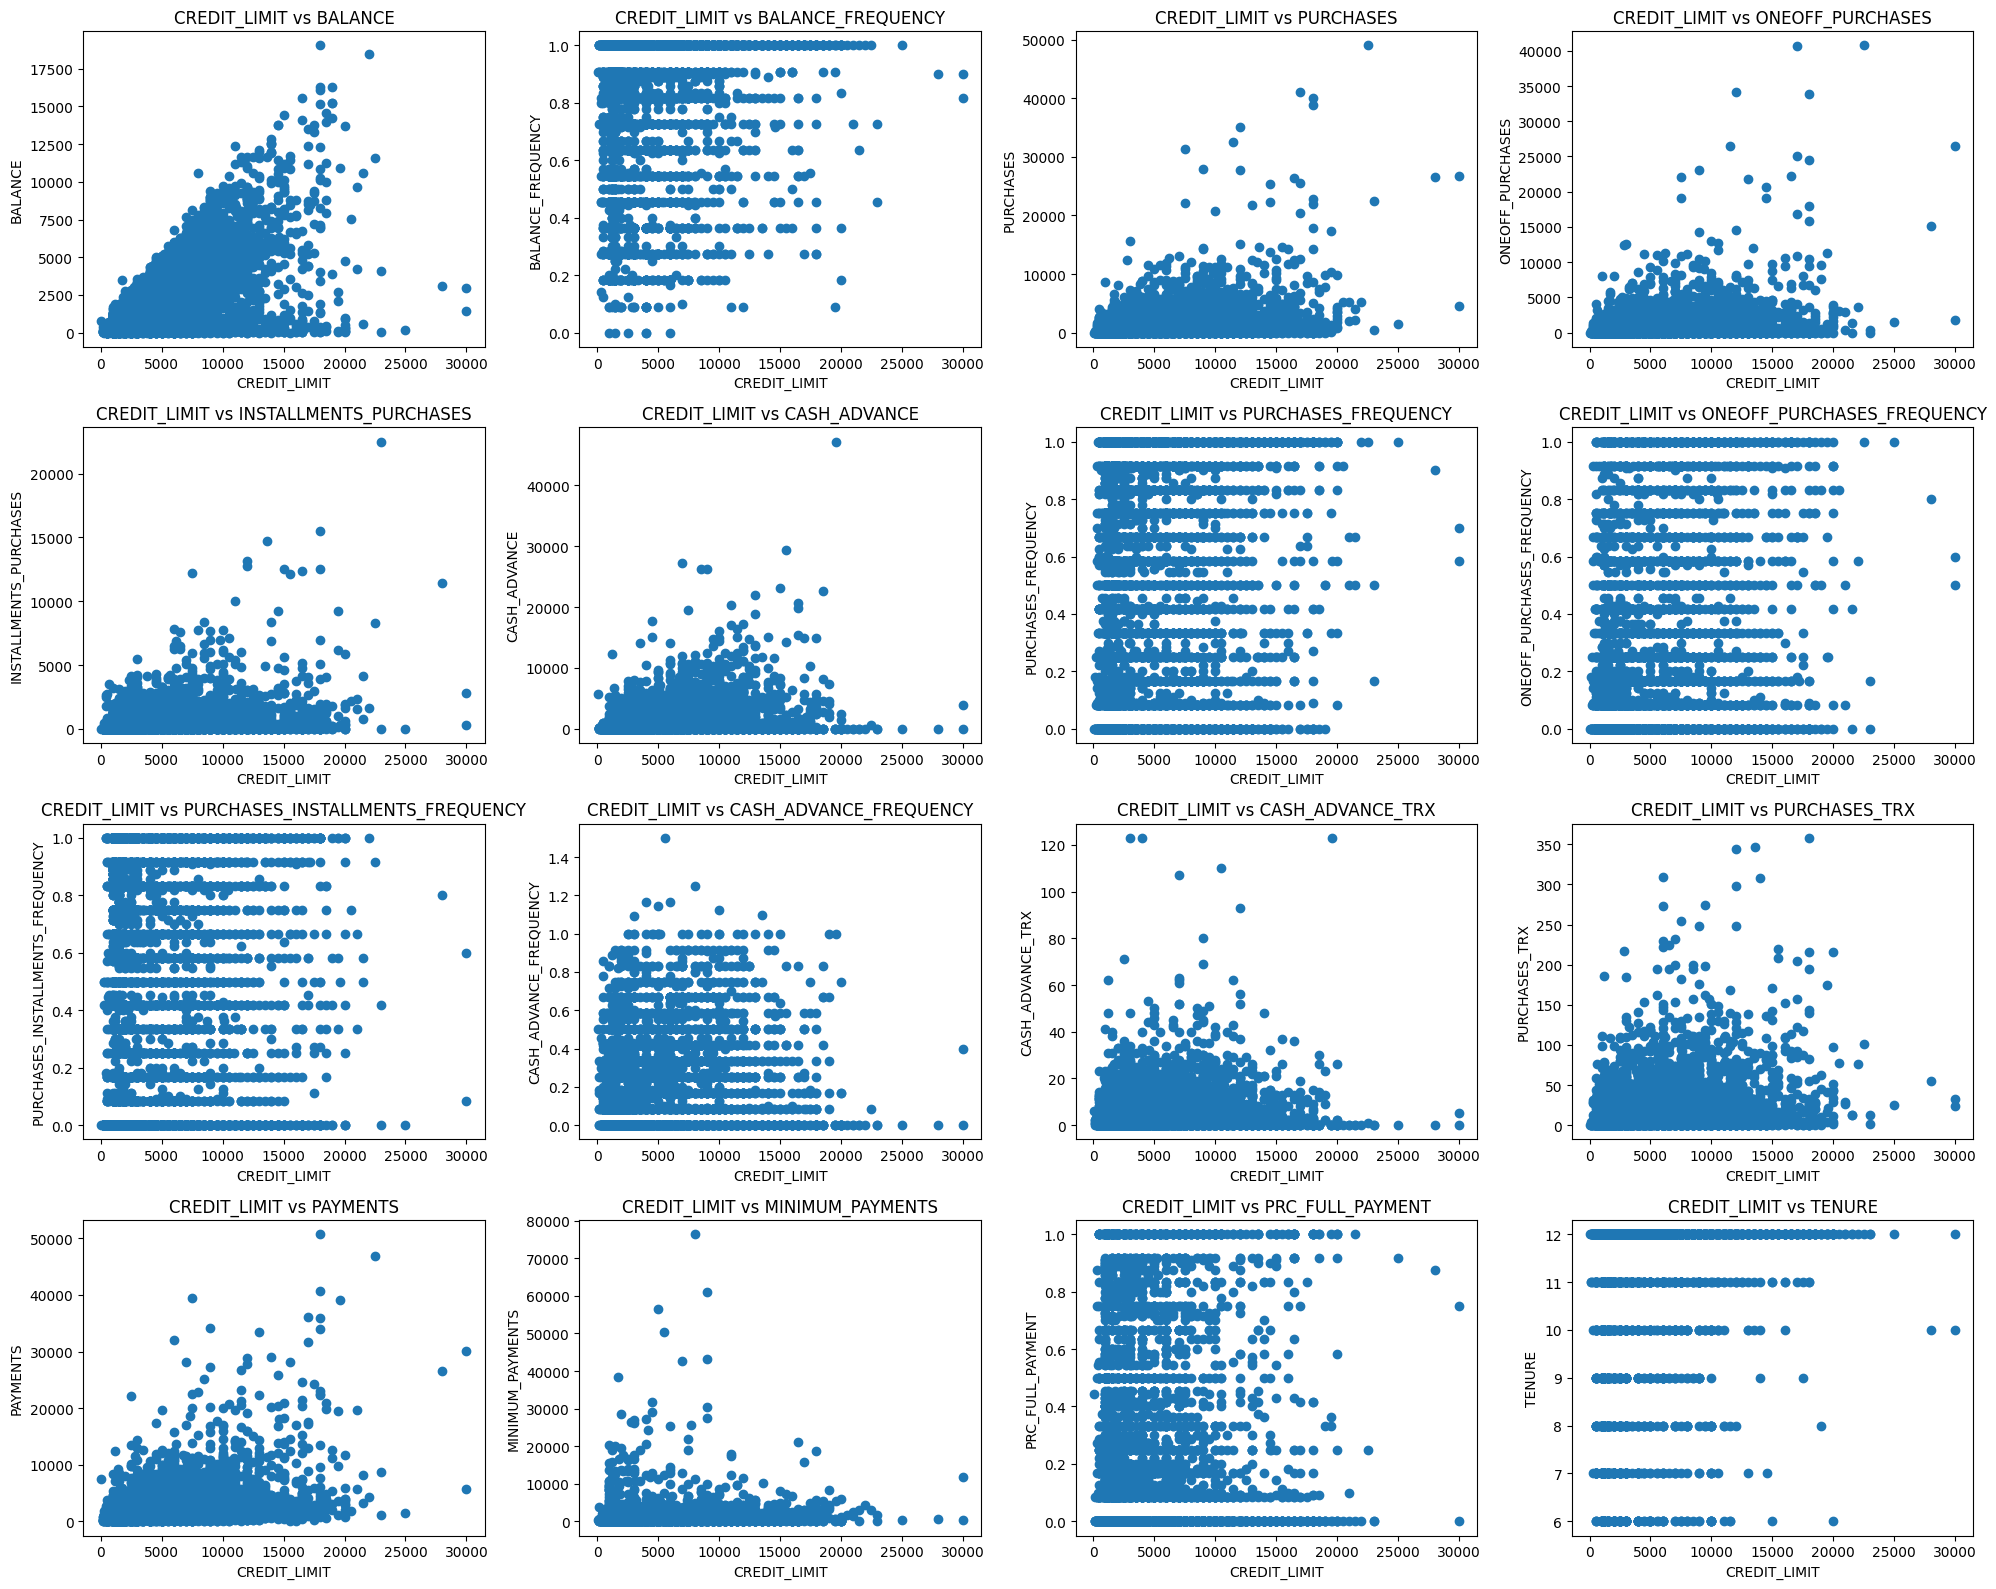

In [34]:
# prompt: Usando o DataFrame df: Faça uma comparação entre CREDIT_LIMIT e todas as outras colunas

def plotting_col_against_others(df, col_name):
  ''' Generate scatter plots to visualize the relationship between 'CREDIT_LIMIT' and all other columns
    Iterate through all columns in the dataframe
  '''
  if col_name == 'CUST_ID':
    return 'Invalid column name'
  cols_to_plot = [col for col in df.columns if col not in [col_name, 'CUST_ID']]
  num_cols = len(cols_to_plot)
  plots_per_line = 4 # Changed from 5 to 4
  num_lines = math.ceil(num_cols / plots_per_line)

  fig, axes = plt.subplots(num_lines, plots_per_line, figsize=(20, 4 * num_lines))
  axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

  for i, col in enumerate(cols_to_plot):
      # Create a scatter plot with 'CREDIT_LIMIT' on the x-axis and the current column on the y-axis
      # The title of the plot indicates the comparison being made
      axes[i].scatter(df['CREDIT_LIMIT'], df[col])
      axes[i].set_xlabel('CREDIT_LIMIT')
      axes[i].set_ylabel(col)
      axes[i].set_title(f'CREDIT_LIMIT vs {col}')

  # Hide any unused subplots
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()
  # save_plot_as_svg_and_png(fig, 'credit_limit_comparison')

plotting_col_against_others(df_gen, 'CREDIT_LIMIT')

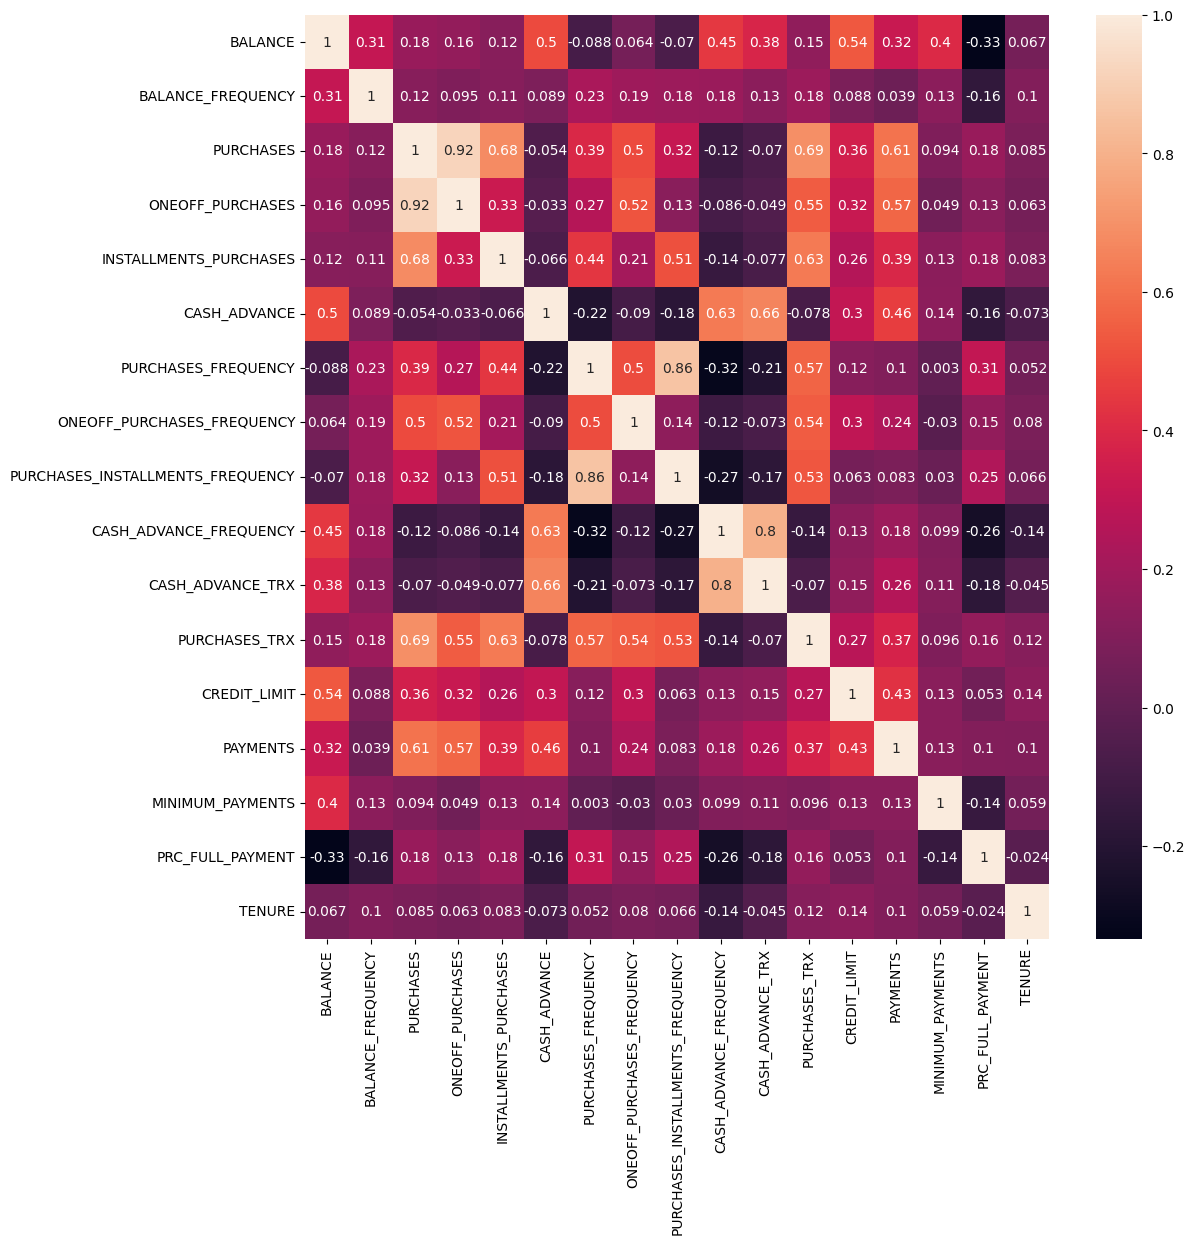

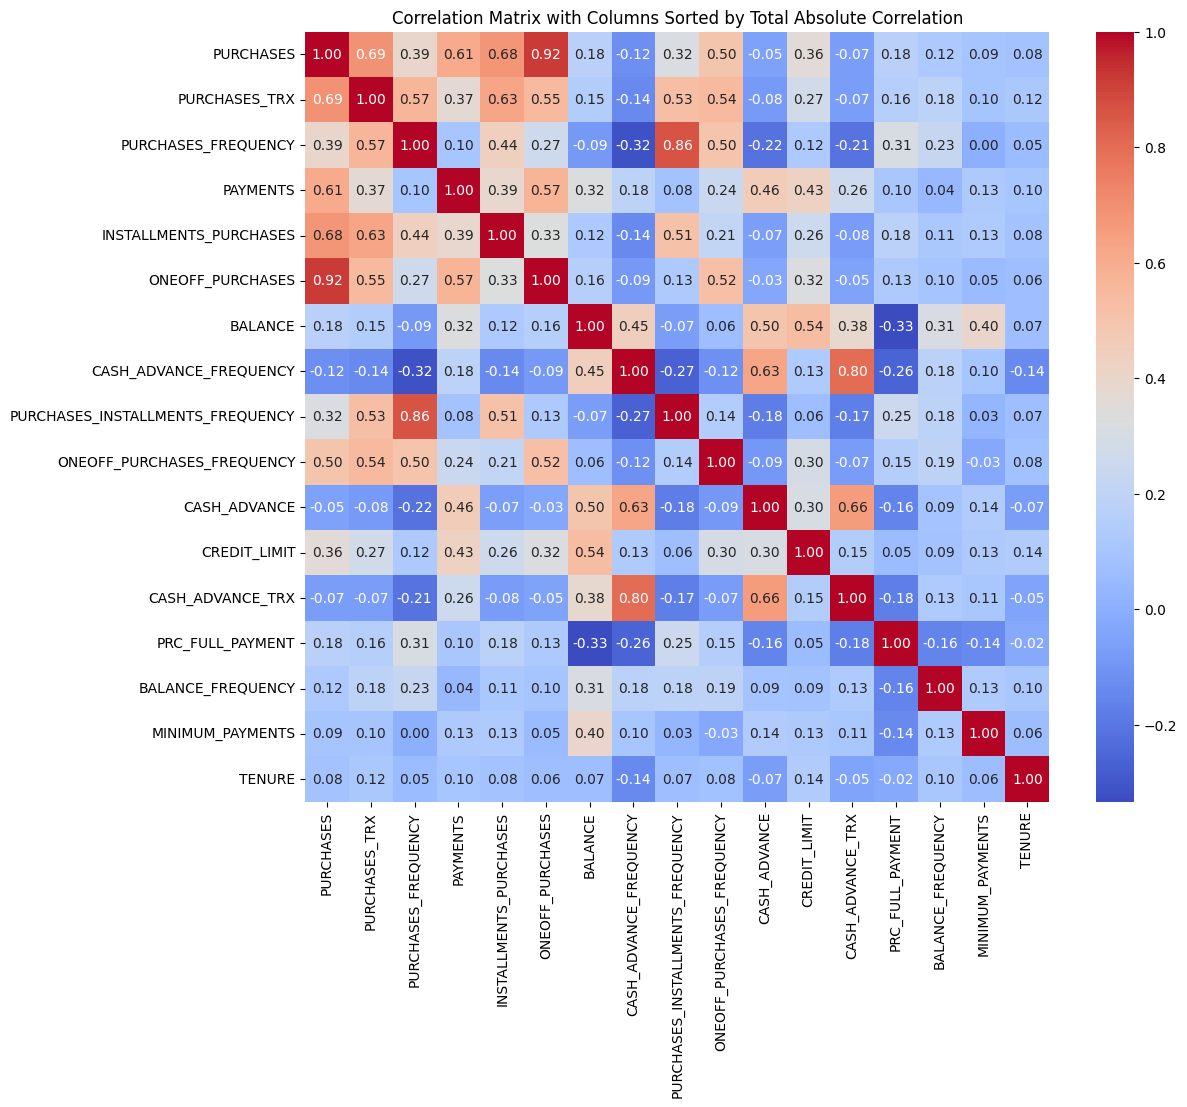

In [35]:
''' Heatmap Correlation '''

def plot_df_corr_heatmap(df, removed_cols=['CUST_ID']):
  ''' Creates a plot of correlated data of the dataframe '''
  df_corr_heatmap = df.drop(columns=removed_cols)
  plt.figure(figsize=(12,12))
  sns.heatmap(df_corr_heatmap.corr(), annot=True)
  plt.show()

def plot_df_corr_heatmap_sorted(df, removed_cols=['CUST_ID']):
  ''' Creates a plot of correlated data of the dataframe '''
  # Calculate the correlation matrix
  corr_matrix = df.drop(columns=['CUST_ID']).corr()

  # Calculate the sum of absolute correlations for each column (excluding the diagonal)
  # The diagonal represents the correlation of a variable with itself, which is always 1
  sum_abs_corr = corr_matrix.abs().sum() - 1

  # Sort columns by the sum of absolute correlations in descending order
  sorted_cols = sum_abs_corr.sort_values(ascending=False).index.tolist()

  # Reorder the DataFrame columns
  df_sorted = df[sorted_cols + ['CUST_ID']] # Keep CUST_ID at the end

  # Display the correlation matrix of the reordered DataFrame
  plt.figure(figsize=(12,10))
  sns.heatmap(df_sorted.drop(columns=['CUST_ID']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation Matrix with Columns Sorted by Total Absolute Correlation')
  plt.show()

plot_df_corr_heatmap(df_gen)
plot_df_corr_heatmap_sorted(df_gen)

## Etapa X.1: Interpretação de resultados
